# Introduction to Differential Equations

## Graphical and Numerical Solutions

### Math 2565
### Spring 2020
### University of Lethbridge

#### Sean Fitzpatrick

## Warm-Up

Find the length of the curve

$$y = \frac{1}{12} x^5 + \frac{1}{5x^3},$$

for $0.5\leq x\leq 2$.


How about the surface area of the surface generated by revolving this curve about the $y$ axis?

## Quiz

Verify that $y = 4e^{2x}-2e^{3x}$ is a solution to the differential equation
$$y'' -5y'+6y=0$$

## Differential Equations

A **differential equation** is any equation relating a (typically unknown) function and one or more of its derivatives. The goal is to find the function(s) that satisfy the equation.

Typically the function in a differential equation will be assigned to some *dependent variable* and depend on one or more *independent variables*.

### Example

$$y' = 4\cos(x)+2$$

Here, $y$ is the dependent variable, $x$ is the independent variable, and a *solution* is given by $y = 4\sin(x)+2x$.

### Terminology

The **order** of a differential equation is the highest derivative that appears.

An **ordinary differential equation** (ODE) involves only one independent variable.

A **partial differential equation** (PDE) involves two or more independent variables (and partial derivatives).

- First order ODE example: $$\frac{dy}{dx} + x^2\, y = e^x$$

- Second order ODE example: $$y'' - ky = 4\sin(3x)$$

- PDE example: $$\frac{1}{i\hbar}\frac{\partial^2 \psi}{\partial x^2} + V(x,t) = \frac{\partial \psi}{\partial t}$$

### Initial Value Problems

A solution to a differential equation typically involves one or more undetermined parameters.

For example, $y=4\sin(x)+2x$ is a solution to $y' = 4\cos(x)+2$, but so is $y=4\sin(x)+2x+C$ for any constant $C$.

The number of parameters is equal to the order of the differential equation.

A solution in terms of these parameters is called the **general solution**. Putting in values for each parameter produces a **particular solution**.

Particular solutions are often determined by *initial values*.

E.g. we can ask for $y'=4\cos(x)+2x$, where $y(0)=2$. 

### Verifying Solutions

To verify that $y=f(x)$ solves a differential equation, simply plug it in and confirm that it works.

Examples:

1. Verify that $x = \cos(t)+\sin(t)$ is a solution to $\frac{dx}{dt}+x=2\cos(t)$
2. Show that $N(t)=Ce^{-5t}$ is a solution to $\frac{dN}{dt} = -5N$, and find the value of $C$ such that $N(0)=2565$.
3. Determine all values of $k$ such that $f(x)=Ce^{kx}$ is a solution to $y''-4y'+4y=0$. What about $g(x)=Cxe^{kx}$?

## Graphical Methods

Many differential equations can be studied *qualitatively* in cases where they can't be studied analytically.

(Finding exact solutions to real-world differential equation models is rare.)

**Phase portraits** are an important tool for the study of dynamical systems. (These are especially useful for nonlinear ODEs and systems of ODEs.)

Using phase portraits we can understand systems in terms of sinks, sources, stable and unstable equlibria, etc.

**Direction fields** capture some of the same ideas, and are easier to understand at the introductory level.

### Phase diagrams for autonomous first order ODEs

Most phase diagrams are higher-dimensional and correspond to systems of coupled first-order ODEs.

They're also really cool, but beyond this course.

We can do something similar for equations of the form $$\dot{x} = \frac{dx}{dt} = f(x).$$<br>
(Note $f(x)$, not $f(x,t)$.)

Here, we can determine whether $x(t)$ is increasing or decreasing simply by whether $f(x)$ is positive or negative. (Sign diagrams!)

### Examples

**Logistic model**: $$\frac{dP}{dt} = kP\left(1-\frac{P}{M}\right)$$

Note: critical points of $f(x)$ in $\dot{x} = f(x)$ correspond to equilibria. (What can you say about local max vs. local min?)

Sometimes small changes in $f(x)$ lead to big changes in behaviour. This is called *bifurcation*.

**Pitchfork bifurcation**: $$\dot{x} = x(k-x^2)$$

This has one critical point for $k\leq 0$, and three, for $k>0$.

### Direction fields

The idea is simple: most first-order ODEs can be put in the form $y' = f(x,y)$ for some function $f$ of $x$ and $y$.

A solution $y=g(x)$ would satisfy $g'(x) = f(x,g(x))$. So $f(x,y)$ gives the **slope** of the tangent line to $y=g(x)$ at $(x,y)$.

To construct a direction field, just evaluate $f(x,y)$ at a sample of points, and plot a short line segment through $(x,y)$ with slope $m=f(x,y)$.

### Example

Plot a direction field for the differential equation $y' = x-y$.

### Example

Plot a direction field for the differential equation $y' = x\sin(y)$.

Maybe we don't want to plot this by hand. Let's [borrow some simple code](http://firsttimeprogrammer.blogspot.com/2014/09/generate-slope-fields-in-r-and-python.html) to do it. The code is set up for the equation $y'=x-y$. You'll need to change the definition of `f(x,y)` to do the $y'=x\sin(y)$ example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def f(x,y): # define our equation
    return x-y # change this to x*np.sin(y) for second example

x = np.linspace(-5,5,20)
y = np.linspace(-5,5,20)

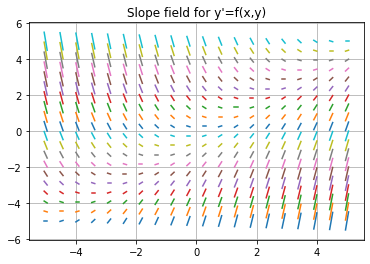

In [3]:
def dfield(f):
    for j in x:
        for k in y:
            slope = f(j,k)
            domain = np.linspace(j-0.05,j+0.05,2)
            def fun(x1,y1):
                z = slope*(domain-x1)+y1
                return z
            plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')

    plt.title("Slope field for y'=f(x,y)")
    plt.grid(True)
    plt.show()
dfield(f)

Next, we can try using the computer to solve the ODE, and see how the solution fits.

We're using the *SciPy*, which is quite powerful. I've borred an example [from here](https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html) that solves a problem similar to ours.

If you anticipate using the computer to solve ODEs in other courses, also consider *SymPy* for equations that can be solved exactly.

One catch with the SciPy syntax that caused me twenty minutes of head-scratching: we need to give $y$ before $x$ in the definition of $f(x,y)$ in the equation $y'=f(x,y)$.


In [4]:
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

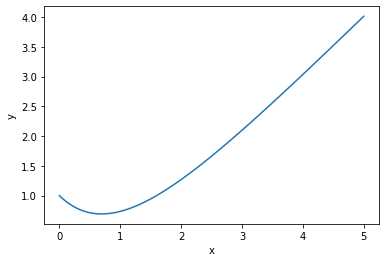

In [5]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys);

Now we try to combine things, and plot the solution curve on the same grid as the direction field.

In [6]:
a = 0.0
b = 5.0
c = 0.0
d = 5.0
slopesamples = 20
solvesamples = 100
xvals = np.linspace(a,b,slopesamples)
yvals = np.linspace(c,d,slopesamples)
xsolve = np.linspace(a,b,solvesamples)
#y0 = -1.0

def func(y,x):
    return x-y

def dfplot(func,y0):
        for j in xvals:
            for k in yvals:
                slope = func(k,j)
                domain = np.linspace(j-0.05,j+0.05,2)
                def fun(x1,y1):
                    z = slope*(domain-x1)+y1
                    return z
                ysolve = odeint(func, y0, xsolve)
                ysolve = np.array(ysolve).flatten()
                plt.plot(domain,fun(j,k),solid_capstyle='projecting',solid_joinstyle='bevel')
                plt.plot(xsolve,ysolve)

        plt.title("Slope field for y'=f(x,y)")
        plt.grid(True)
        plt.ylim(c,d)
        plt.xlim(a,b)

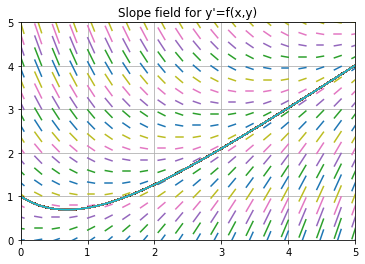

In [7]:
dfplot(func,1.0)

## Numerical Methods

Note that the `odeint` function from SciPy does not give us a function in the sence you're used to.

Instead, for a set of possible $x$ values, it determines corresponding $y$ values numerically.

There are some very sophisticated methods for doing this. We'll look at one of the most basic.

### Euler's Method

- Essentially a numerical counterpart to slope fields.
- Recall the linear approximation $$g(x_0+\Delta x) \approx g(x_0) + g'(x_0)\Delta x$$.
- Given $y'=f(x,y)$, look for solution $y=g(x)$ with initial condition $g(x_0)=y_0$.
- Notice $g'(x_0) = f(x_0,y_0)$.
- Proceed in "steps", with fixed **step size** $\Delta x$ as follows:

1. $(x_0,y_0)$ is given.
2. $x_1 = x_0+\Delta x$ and $y_1 = y_0+f(x_0,y_0)\Delta x$
3. $x_2 = x_0+2\Delta x$ and $y_2 = y_1+f(x_1,y_1)\Delta x$
4. $x_3 = x_0+3\Delta x$ and $y_3 = y_2+f(x_2,y_2)\Delta x$

etc.

### Error analysis

Euler's method is simple, but imprecise.

- Using linear approximation introduces truncation error.
- Size of this error depends on step size.
- Error compounds at every step due to recursive nature.

### Example

Use Euler's method to approximate the solution to $y'=x-y$, with initial condition $y(0)=1$, step size of $0.1$, and 10 steps.

|$i$ | $x_i$ | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $y_i$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
|----|-------|------|
| 0 | 0 | 1 |
| 1 | 0.1 | $1+(0-1)(0.1) = 0.9$|
| 2 | 0.2 | $0.9 + (0.1-0.9)(0.1) = 0.82$|
| 3 | 0.3 |  |

We might need a code cell as a calculator.

### Code for Euler's Method

The following is borrowed from [Patrick Walls at UBC](https://www.math.ubc.ca/~pwalls/math-python/differential-equations/first-order/). We define a function called odeEuler that implements the steps outlined above.

Input is an ODE of the form $y'=f(y,t)$. Syntax is `odeEuler(f,y0,t)`, where:
- `f` is our function
- `y0` is the initial value for $y$, corresponding to the value in `t` at index 0.
- `t` is a NumPy array (the values to be used for the steps)

In [8]:
def odeEuler(f,y0,t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

The output is a NumPy array containing the $y$ values correpsonding to the $t$ values in `t`. Let's try it out.<br>
The next cell will print the sample $t$ values, and then the corresponding $y$ values. `np.linspace(0,1,11)` means we use the interval $[0,1]$, with 11 sample points.

In [9]:
def f(y,t):
    return t-y
t = np.linspace(0,1,11)
y0 = 1

t,odeEuler(f,y0,t)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 0.9       , 0.82      , 0.758     , 0.7122    ,
        0.68098   , 0.662882  , 0.6565938 , 0.66093442, 0.67484098,
        0.69735688]))

#### Checking the solution

How well does our algorithm work? We can plot our values against the exact ones.<br>
The equation $$\frac{dy}{dt} = t-y$$ is linear -- we'll learn how to solve it soon.
The general solution is $$y(t)=t-1+Ce^{-t}.$$ With $y(t)=1$ we get $C=2$.

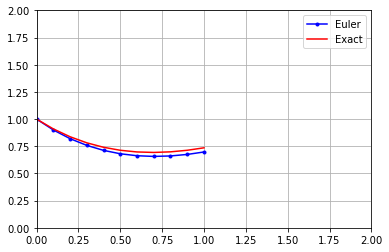

In [10]:
y_exact = t - 1 + 2*np.exp(-t)
y_euler = odeEuler(f,y0,t)
plt.plot(t,y_euler,'b.-',t,y_exact,'r-')
plt.legend(['Euler','Exact'])
plt.axis([0,2,0,2])
plt.grid(True)
plt.show()

### Symbolic solving with SymPy

Another option is the SymPy library for symbolic manipulation. SymPy can handle most derivatives and integrals that Maple (or Wolfram Alpha) can, as well as ODEs. The diffrerence with SymPy is that it does *not* use numerical methods: it tries to give exact symbolic expressions. (And the `init_printing()` function enables nicely-formatted output.)

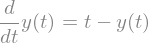

In [11]:
import sympy as sy
sy.init_printing()
t = sy.symbols('t')
y = sy.Function('y')(t)

ydot = y.diff(t)
eq = sy.Eq(ydot,t-y)
eq

In [12]:
sol=sy.dsolve(eq)
sol

In [13]:
sy.simplify(sol)